# Smoking Dataset from the UK

#### Survey data on smoking habits from the United Kingdom. The data set can be used for analyzing the demographic characteristics of smokers and types of tobacco consumed. A data frame with 1691 observations on 12 variables.

This data has been sourced from Kaggle - https://www.kaggle.com/datasets/utkarshx27/smoking-dataset-from-uk

I have selected it based on my NHS healthcare background and academic research into drug discovery. Public health is a hugely important field of work, and I am interested in combining it with my data analysis skills in a desire to draw meaningful conclusions.

I would like to investigate whether there is any correlation between people's smoking status and the various demographics explored in this dataset. Doing so will provide a greater understanding behind the factors that can influence likeliness of smoking, but could also drive further studies and work to tackle the impact smoking has on public health in the UK, and the burden it can place on the NHS.

TEST

#### Hypotheses

1) There will be no correlation between smoking and gender.
2) There will be a correlation between smoking and marital status.
3) There will be a correlation between smoking and highest_qualification.
4) There will be a correlation between smoking and gross income.
5) There will be a correlation between smoking and age.
6) There will be no correlation between smoking and nationality/ethnicity. 

I will also look at the distribution of amount smoked and attempt to draw meaningful conclusions here.

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from matplotlib.colors import ListedColormap
from IPython.display import display_markdown

In [85]:
df = pd.read_csv("smoking.csv")

In [86]:
df.head()

,Unnamed: 0,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type
0,1,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN
1,2,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets
2,3,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN
3,4,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN
4,5,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN


In [87]:
df.describe()

,Unnamed: 0,age,amt_weekends,amt_weekdays
count,1691.000000,1691.000000,421.000000,421.000000
mean,846.000000,49.836192,16.410926,13.750594
std,488.293969,18.736851,9.892988,9.388292
min,1.000000,16.000000,0.000000,0.000000
25%,423.500000,34.000000,10.000000,7.000000
50%,846.000000,48.000000,15.000000,12.000000
75%,1268.500000,65.500000,20.000000,20.000000
max,1691.000000,97.000000,60.000000,55.000000


In [88]:
df.describe(include='O')

,gender,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,type
count,1691,1691,1691,1691,1691,1691,1691,1691,421
unique,2,5,8,8,7,10,7,2,4
top,Female,Married,No Qualification,English,White,"5,200 to 10,400",Midlands & East Anglia,No,Packets
freq,965,812,586,833,1560,396,443,1270,297


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1691 entries, 0 to 1690
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             1691 non-null   int64  
 1   gender                 1691 non-null   object 
 2   age                    1691 non-null   int64  
 3   marital_status         1691 non-null   object 
 4   highest_qualification  1691 non-null   object 
 5   nationality            1691 non-null   object 
 6   ethnicity              1691 non-null   object 
 7   gross_income           1691 non-null   object 
 8   region                 1691 non-null   object 
 9   smoke                  1691 non-null   object 
 10  amt_weekends           421 non-null    float64
 11  amt_weekdays           421 non-null    float64
 12  type                   421 non-null    object 
dtypes: float64(2), int64(2), object(9)
memory usage: 171.9+ KB


In [90]:
for col in df.columns:
    print (df[col].value_counts())
    print ('=' * 40)

Unnamed: 0
1       1
1111    1
1135    1
1134    1
1133    1
       ..
561     1
560     1
559     1
558     1
1691    1
Name: count, Length: 1691, dtype: int64
gender
Female    965
Male      726
Name: count, dtype: int64
age
40    43
34    40
31    38
42    37
33    36
      ..
90     3
91     2
93     2
95     1
97     1
Name: count, Length: 79, dtype: int64
marital_status
Married      812
Single       427
Widowed      223
Divorced     161
Separated     68
Name: count, dtype: int64
highest_qualification
No Qualification     586
GCSE/O Level         308
Degree               262
Other/Sub Degree     127
Higher/Sub Degree    125
A Levels             105
GCSE/CSE             102
ONC/BTEC              76
Name: count, dtype: int64
nationality
English     833
British     538
Scottish    142
Other        71
Welsh        66
Irish        23
Refused      17
Unknown       1
Name: count, dtype: int64
ethnicity
White      1560
Asian        41
Black        34
Chinese      27
Mixed        14
Refused

I have made the decision to drop the "Unnamed" column and removed any instances of unknown/refused demographic data.

In [92]:
df.drop('Unnamed: 0', axis=1, inplace=True)

df_clean = df[(df['gross_income'] != 'Refused') & (df['gross_income'] != 'Unknown') & (df['ethnicity'] != 'Refused')\
   & (df['ethnicity'] != 'Unknown') & (df['nationality'] != 'Refused') & (df['nationality'] != 'Unknown')\
  ].copy()

In [93]:
for col in df_clean.columns:
    print (df_clean[col].value_counts())
    print ('=' * 40)

gender
Female    885
Male      676
Name: count, dtype: int64
age
34    40
40    40
31    37
42    35
37    33
      ..
83     2
87     2
91     2
95     1
97     1
Name: count, Length: 79, dtype: int64
marital_status
Married      759
Single       386
Widowed      201
Divorced     149
Separated     66
Name: count, dtype: int64
highest_qualification
No Qualification     523
GCSE/O Level         283
Degree               252
Higher/Sub Degree    123
Other/Sub Degree     118
GCSE/CSE              98
A Levels              91
ONC/BTEC              73
Name: count, dtype: int64
nationality
English     773
British     511
Scottish    134
Other        66
Welsh        56
Irish        21
Name: count, dtype: int64
ethnicity
White      1457
Asian        38
Black        32
Chinese      20
Mixed        14
Name: count, dtype: int64
gross_income
5,200 to 10,400     394
10,400 to 15,600    268
2,600 to 5,200      255
15,600 to 20,800    188
20,800 to 28,600    155
Under 2,600         133
Above 36,400     

The age column is a bit tricky to analysis with 79 different values, so I will write a small function to create a new column, age_group, which will categorise the responses into some larger buckets. By amending the "val" variable, different bucket sizes can be created. I have chosen 10 buckets for my further analysis.

In [95]:
max = df['age'].max()
min = df['age'].min()

print(f' The minimum age is {min}')
print(f' The maximum age is {max}')

 The minimum age is 16
 The maximum age is 97


In [96]:
def agegroup(age):
    val = 10
    bucket = ((max - min) // val) + 1
    for j in range(0,10):
        if (min + (j * bucket)) <= age <= (min + ((j + 1) * bucket)):
            return f' {min + (j * bucket)} - {min + ((j + 1) * bucket)}'

In [97]:
df_clean['age_group'] = df_clean['age'].apply(agegroup)
df_clean.head()

,gender,age,marital_status,highest_qualification,nationality,ethnicity,gross_income,region,smoke,amt_weekends,amt_weekdays,type,age_group
0,Male,38,Divorced,No Qualification,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,34 - 43
1,Female,42,Single,No Qualification,British,White,"Under 2,600",The North,Yes,12.0,12.0,Packets,34 - 43
2,Male,40,Married,Degree,English,White,"28,600 to 36,400",The North,No,NaN,NaN,NaN,34 - 43
3,Female,40,Married,Degree,English,White,"10,400 to 15,600",The North,No,NaN,NaN,NaN,34 - 43
4,Female,39,Married,GCSE/O Level,British,White,"2,600 to 5,200",The North,No,NaN,NaN,NaN,34 - 43


## Data Analysis

For each category, I will produce three graphs:

1) A pie chart showing the breakdown in each category across all respondents
2) A bar chat comparing those who smoke and those who don't across the metrics in each category
3) A percentage bar chart to show the fraction in each metric who smoke (i.e. normalised data against the total sample)

To compute 3), which is less straightforward, I have written a function that will take the category column title as an argument and output the requisite table to be plotted.

Using this produced data, I will attempt to answer my initial hypotheses. It will be useful to computer p values to determine if there is a correlation.

The below code cell has been added in to create a list of values within each category to aid with sorting the graphs correctly. In particular, I have manually ordered the highest qualification and income values.

In [100]:
categories = df_clean.columns[~df_clean.columns.isin(['smoke','amt_weekends','amt_weekdays','age','type'])].to_list()

qualorder = ['No Qualification', 'GCSE/CSE', 'GCSE/O Level', 'ONC/BTEC', 'A Levels', 'Other/Sub Degree', 'Degree', 'Higher/Sub Degree']
incorder = ['Under 2,600', '2,600 to 5,200', '5,200 to 10,400', '10,400 to 15,600', '15,600 to 20,800', '20,800 to 28,600', '28,600 to 36,400', 'Above 36,400']

for category in categories:
    if category == 'highest_qualification':
        order = qualorder
    elif category == 'gross_income':
        order = incorder
    else:
        order = df_clean[category].sort_values().unique()
    print(order)

['Female' 'Male']
['Divorced' 'Married' 'Separated' 'Single' 'Widowed']
['No Qualification', 'GCSE/CSE', 'GCSE/O Level', 'ONC/BTEC', 'A Levels', 'Other/Sub Degree', 'Degree', 'Higher/Sub Degree']
['British' 'English' 'Irish' 'Other' 'Scottish' 'Welsh']
['Asian' 'Black' 'Chinese' 'Mixed' 'White']
['Under 2,600', '2,600 to 5,200', '5,200 to 10,400', '10,400 to 15,600', '15,600 to 20,800', '20,800 to 28,600', '28,600 to 36,400', 'Above 36,400']
['London' 'Midlands & East Anglia' 'Scotland' 'South East' 'South West'
 'The North' 'Wales']
[' 16 - 25' ' 25 - 34' ' 34 - 43' ' 43 - 52' ' 52 - 61' ' 61 - 70'
 ' 70 - 79' ' 79 - 88' ' 88 - 97']


In [101]:
def summary1(var):
    summary = df_clean.groupby([var,'smoke'])[[var]].count().unstack()
    summary.columns = summary.columns.droplevel([0])
    summary = summary.rename_axis(None, axis=1).reset_index().set_index(var)
    summary['Proportion']=round((summary['Yes']/ (summary['No'] + summary['Yes'])) * 100,0)
    return summary

### Smoking Status vs Demographic Data

The below code has been written in the form of a loop over the categorical data to simplify/expedite the production of the graphs.

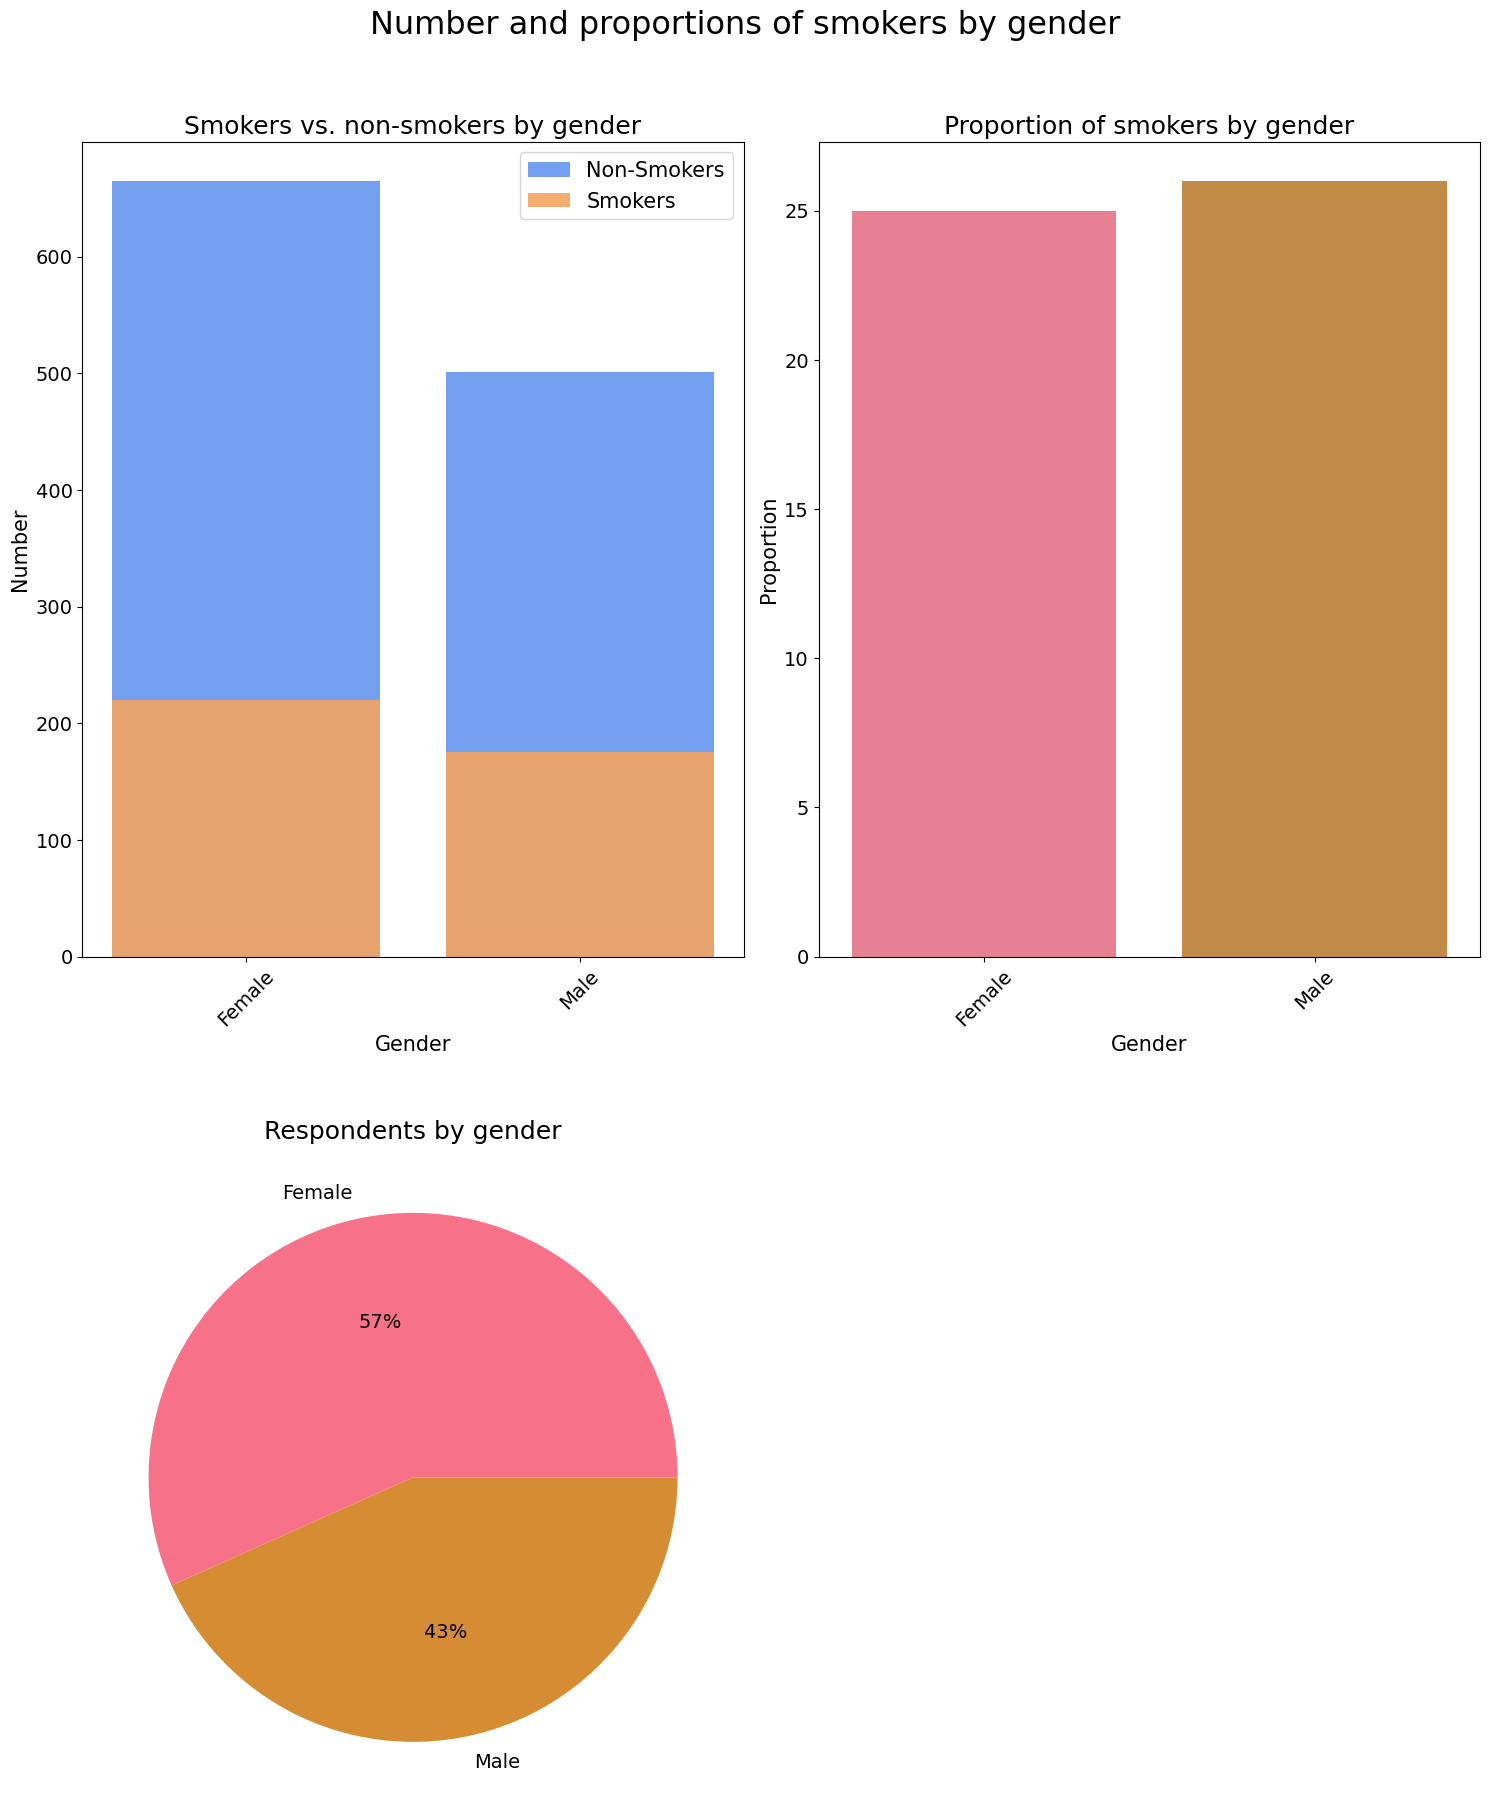

Accept H₀: there is no significant correlation between smoking and gender.

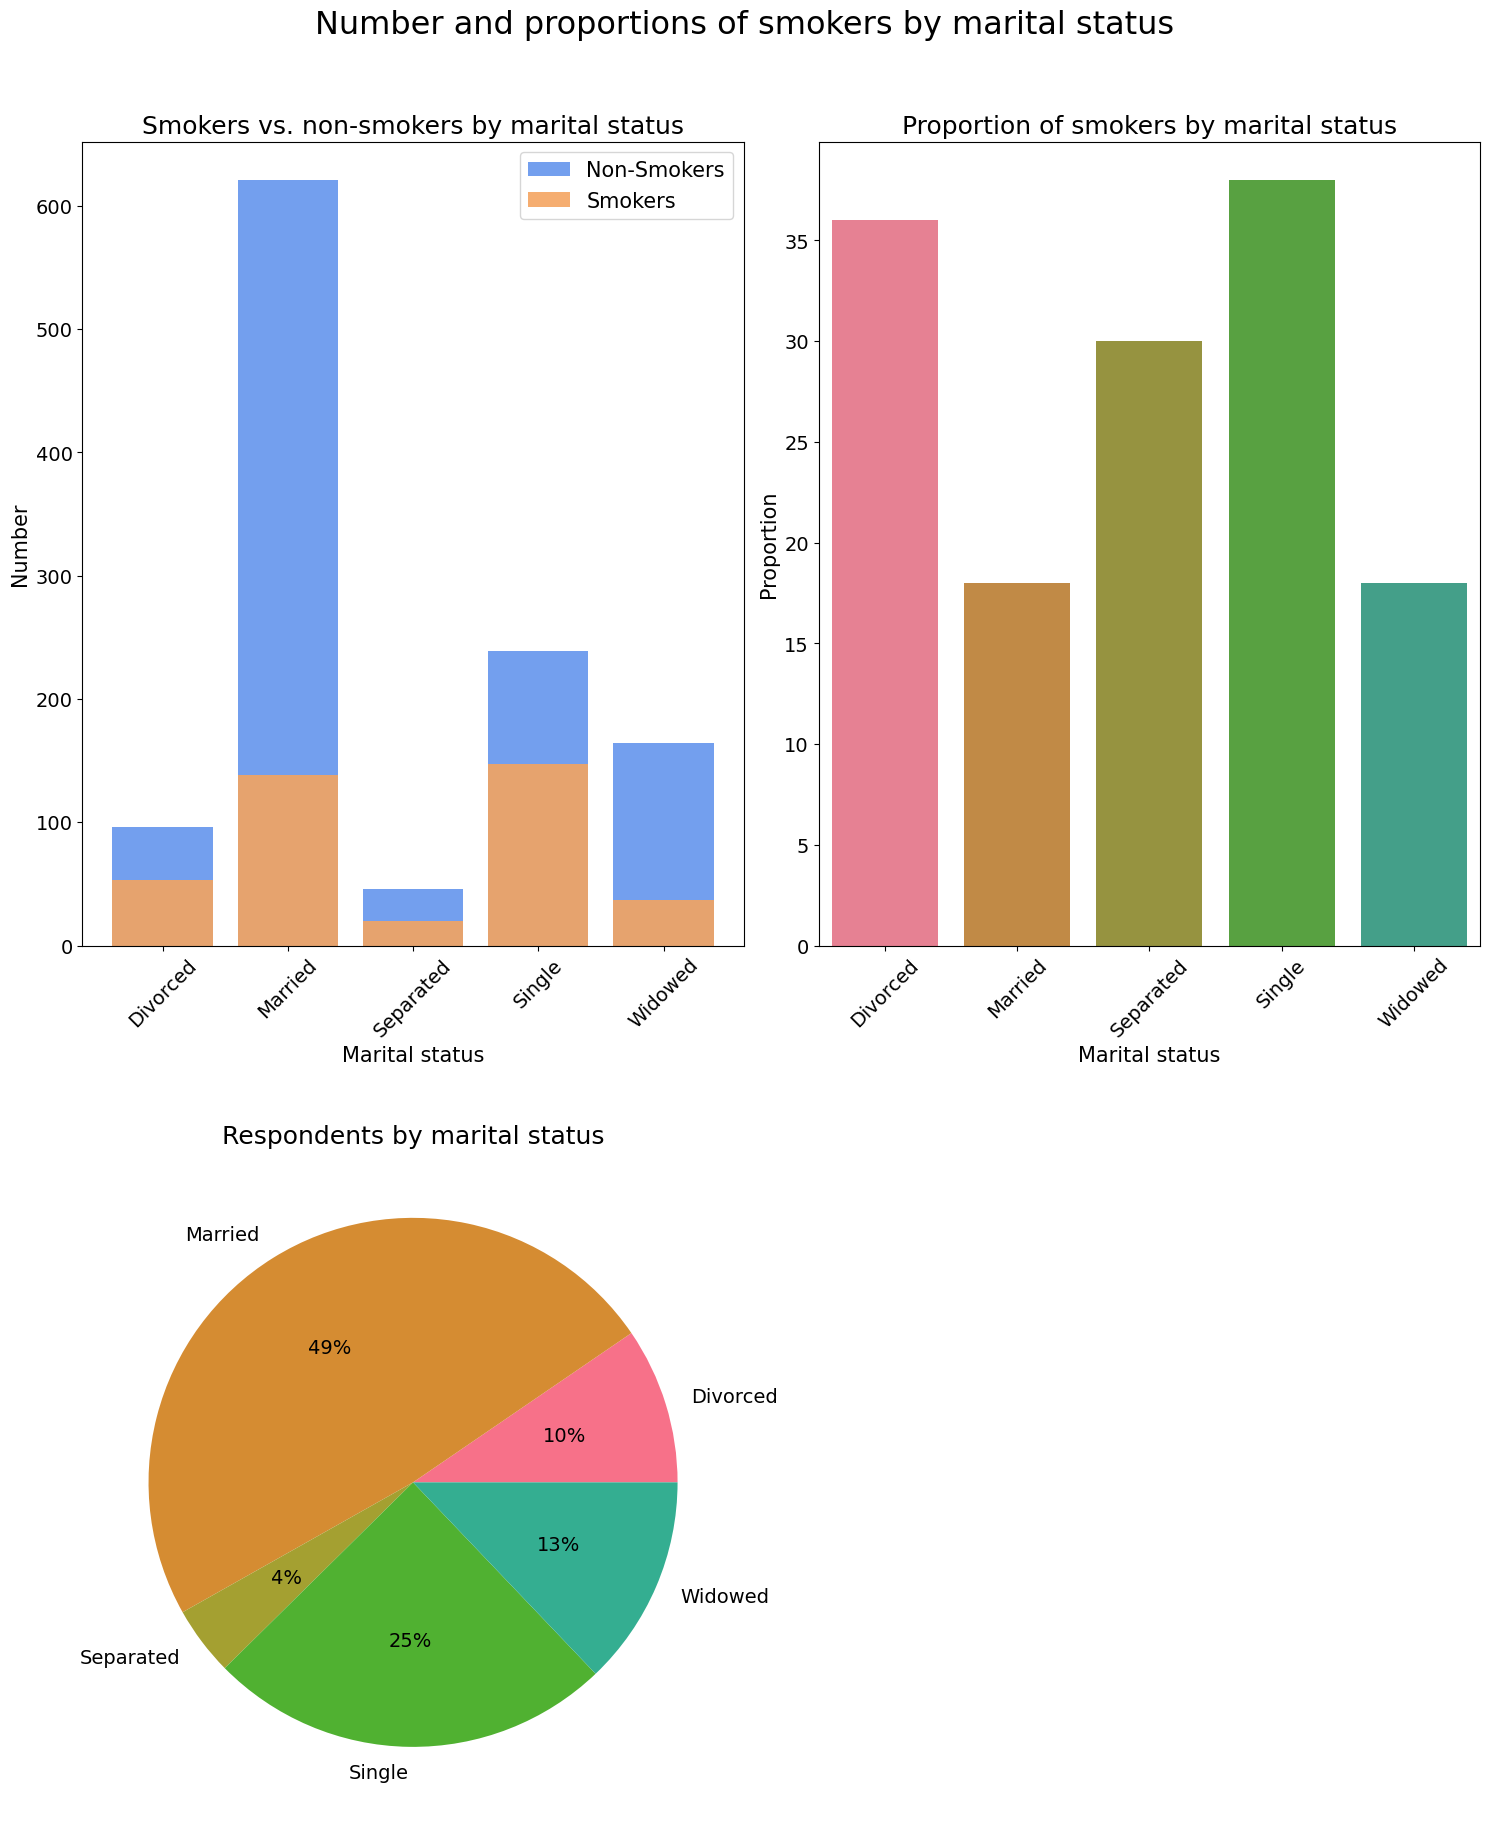

Reject H₀, accept H₁: there is a significant correlation between smoking and marital status.

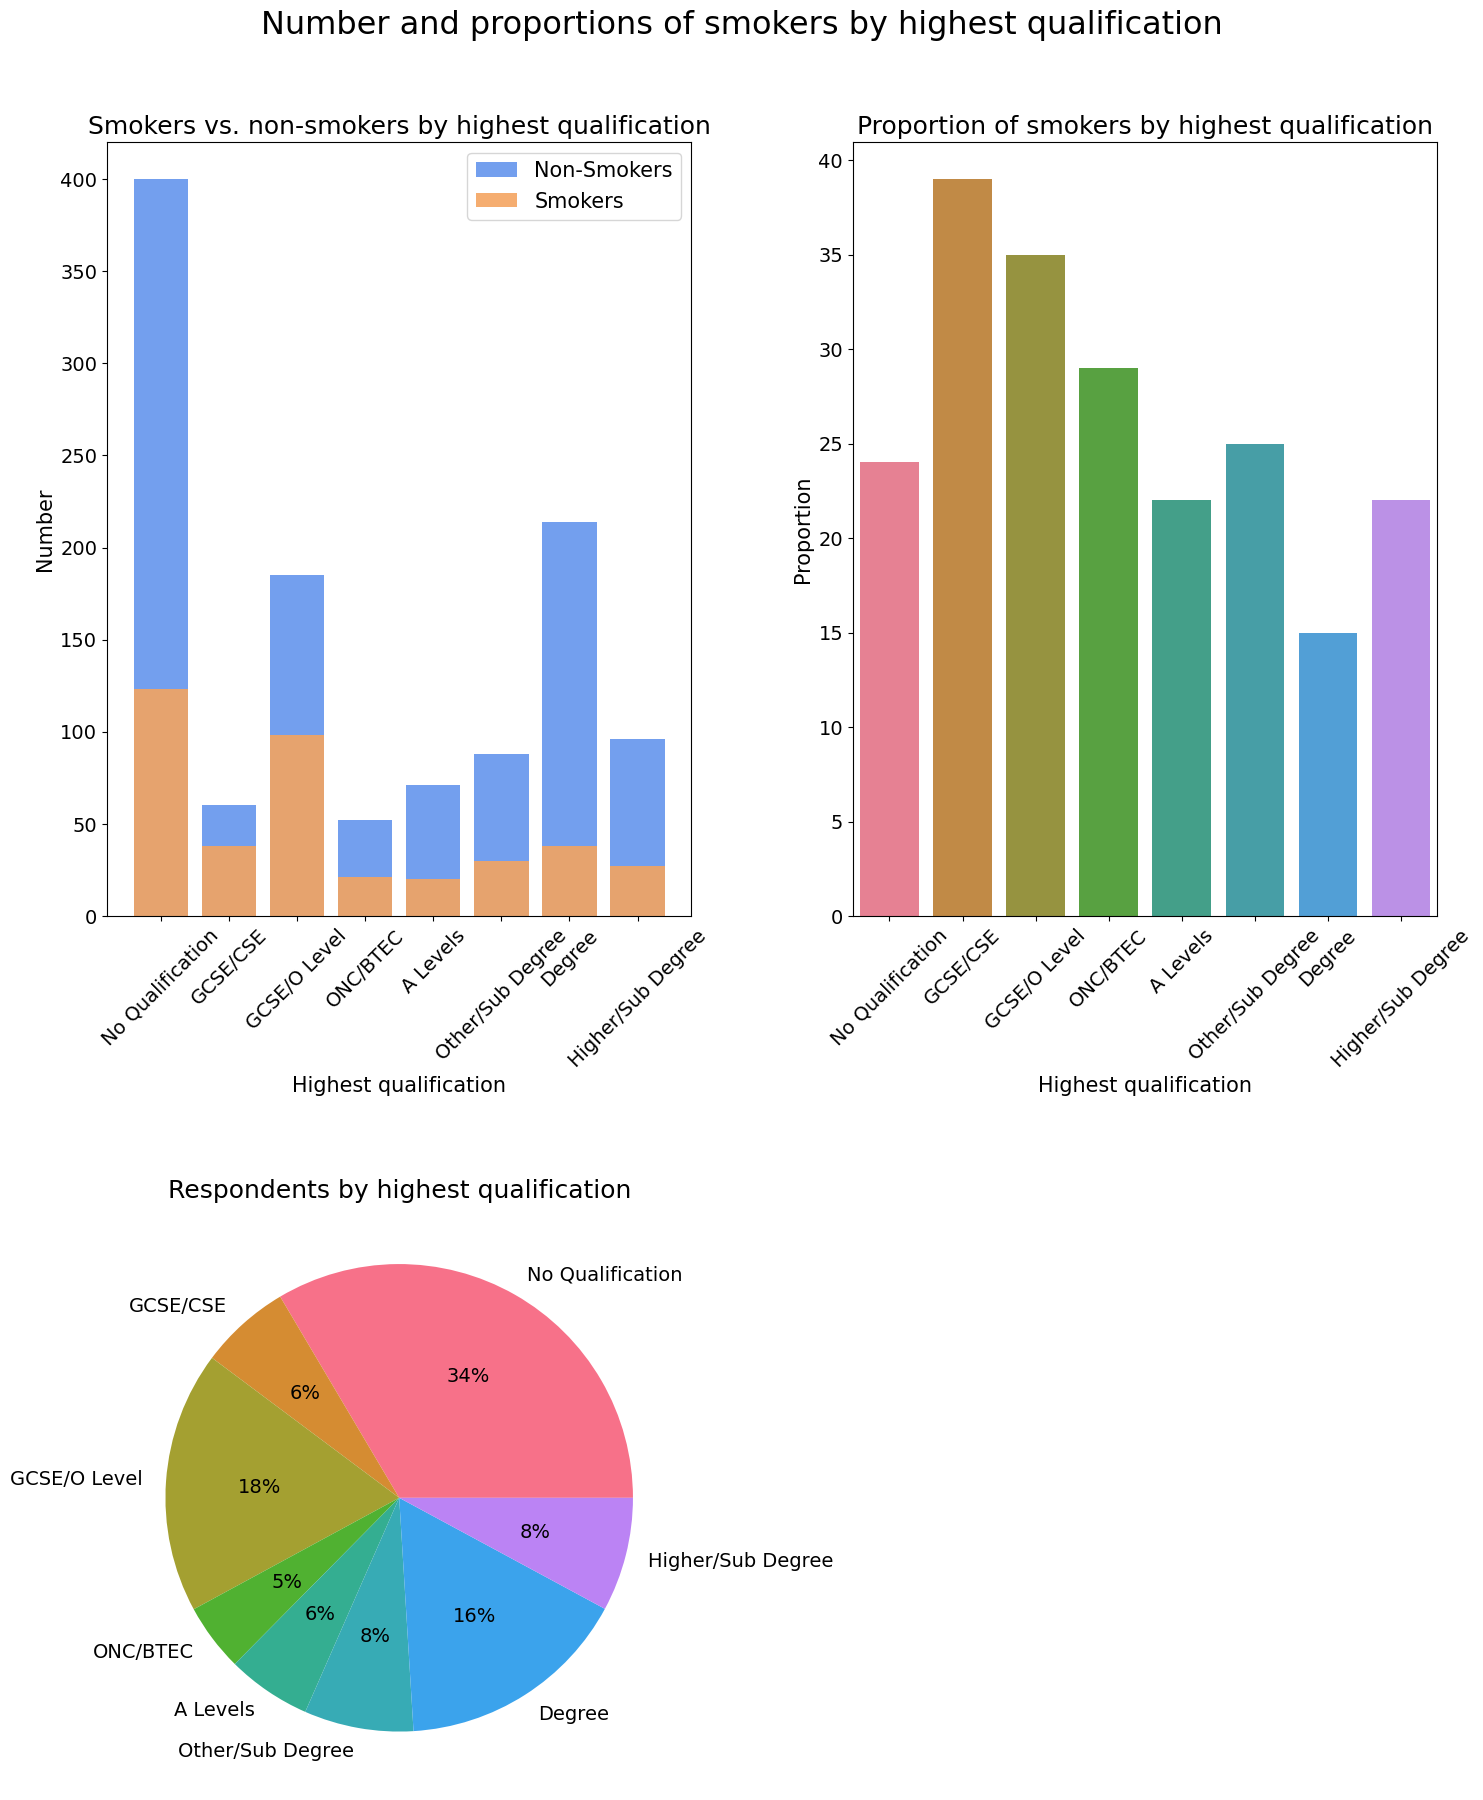

Reject H₀, accept H₁: there is a significant correlation between smoking and highest qualification.

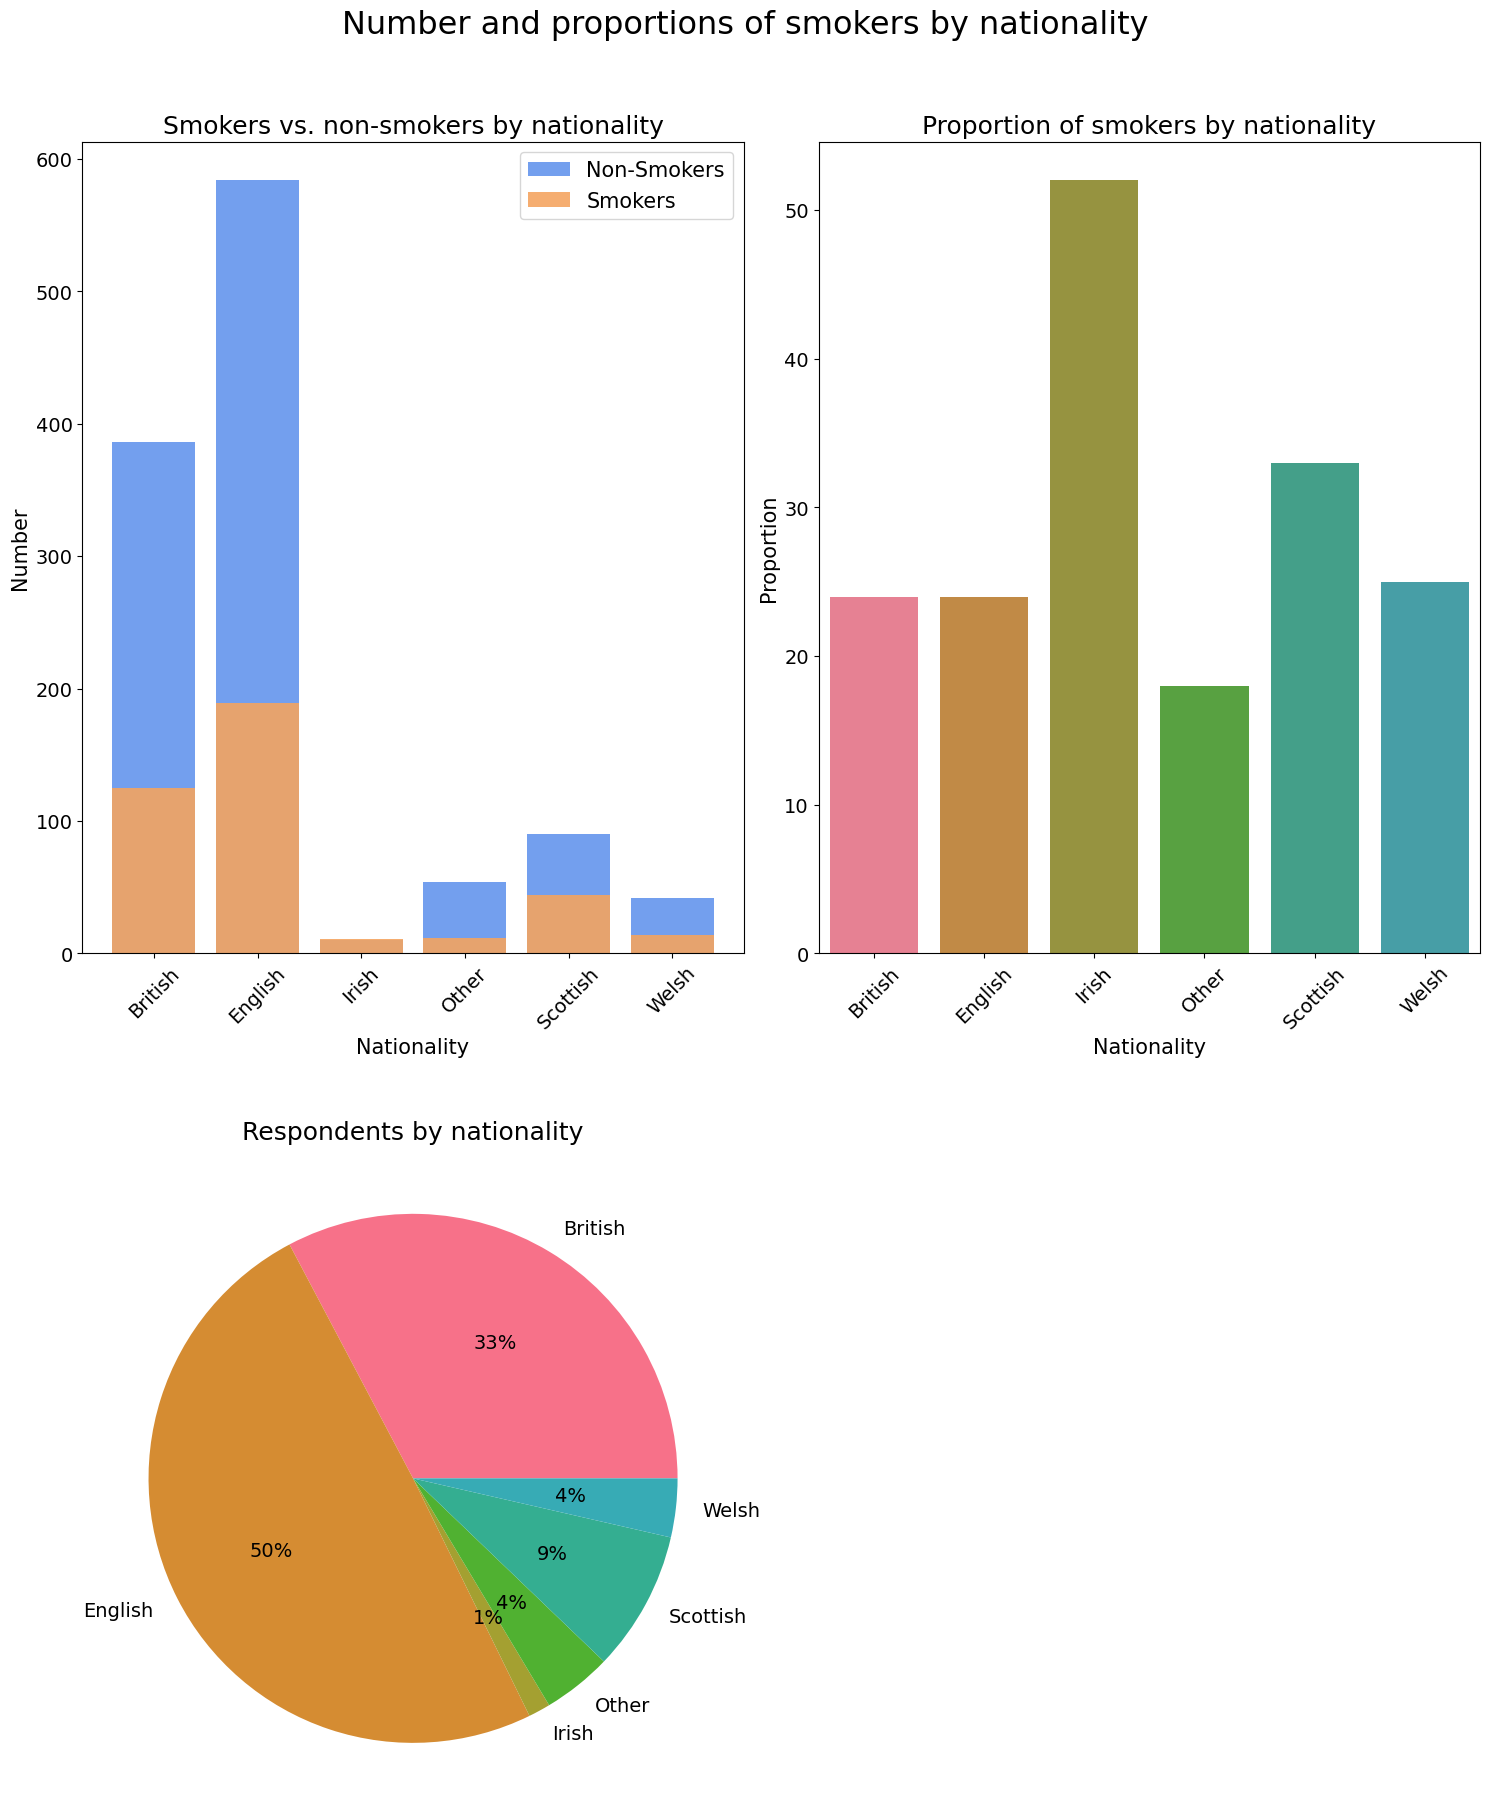

Reject H₀, accept H₁: there is a significant correlation between smoking and nationality.

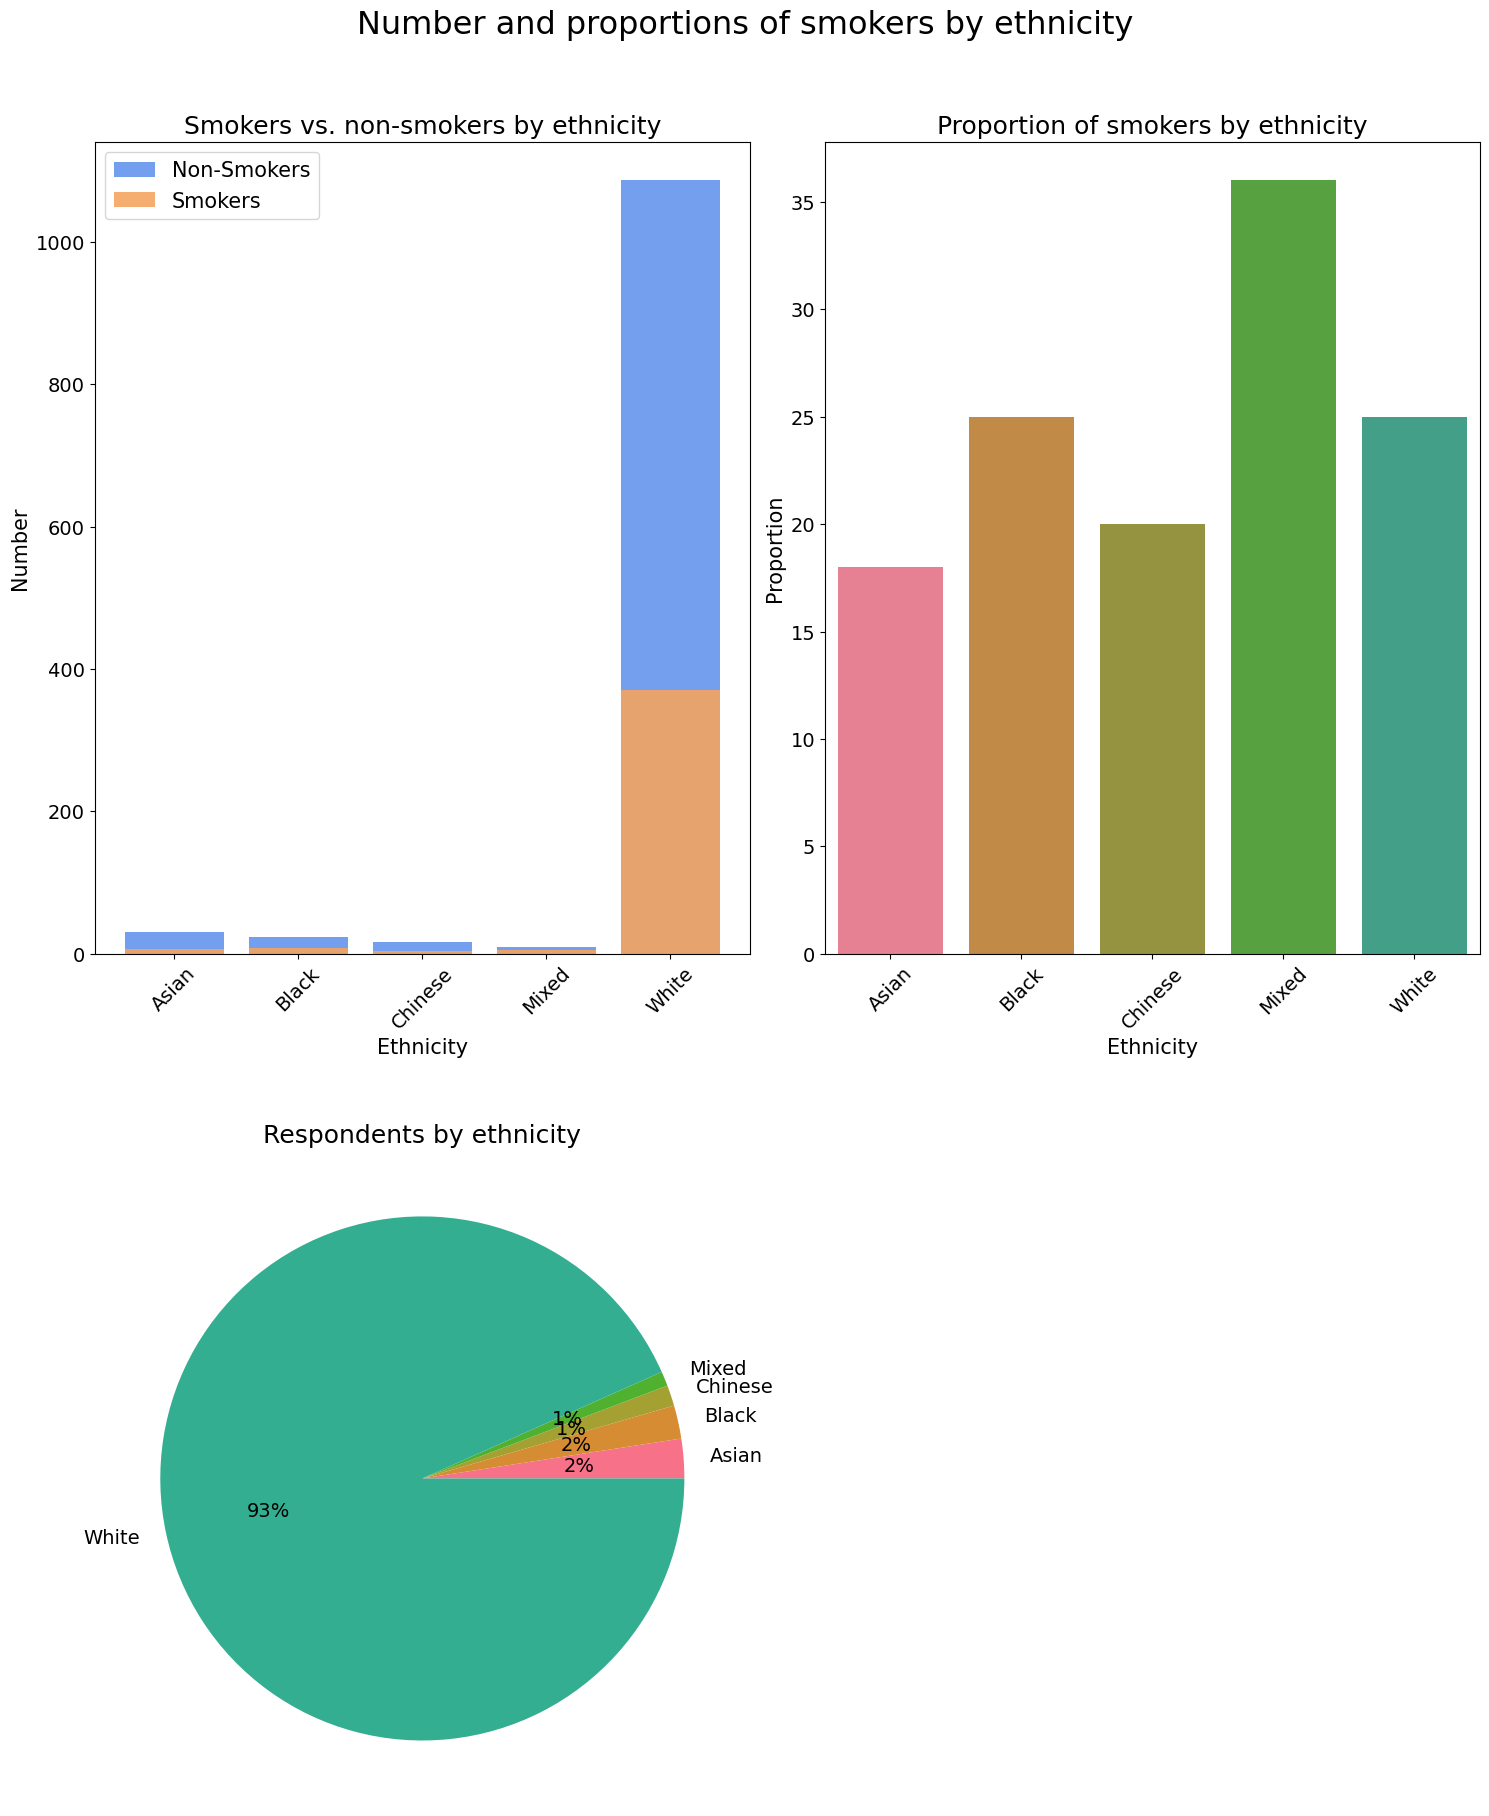

Accept H₀: there is no significant correlation between smoking and ethnicity.

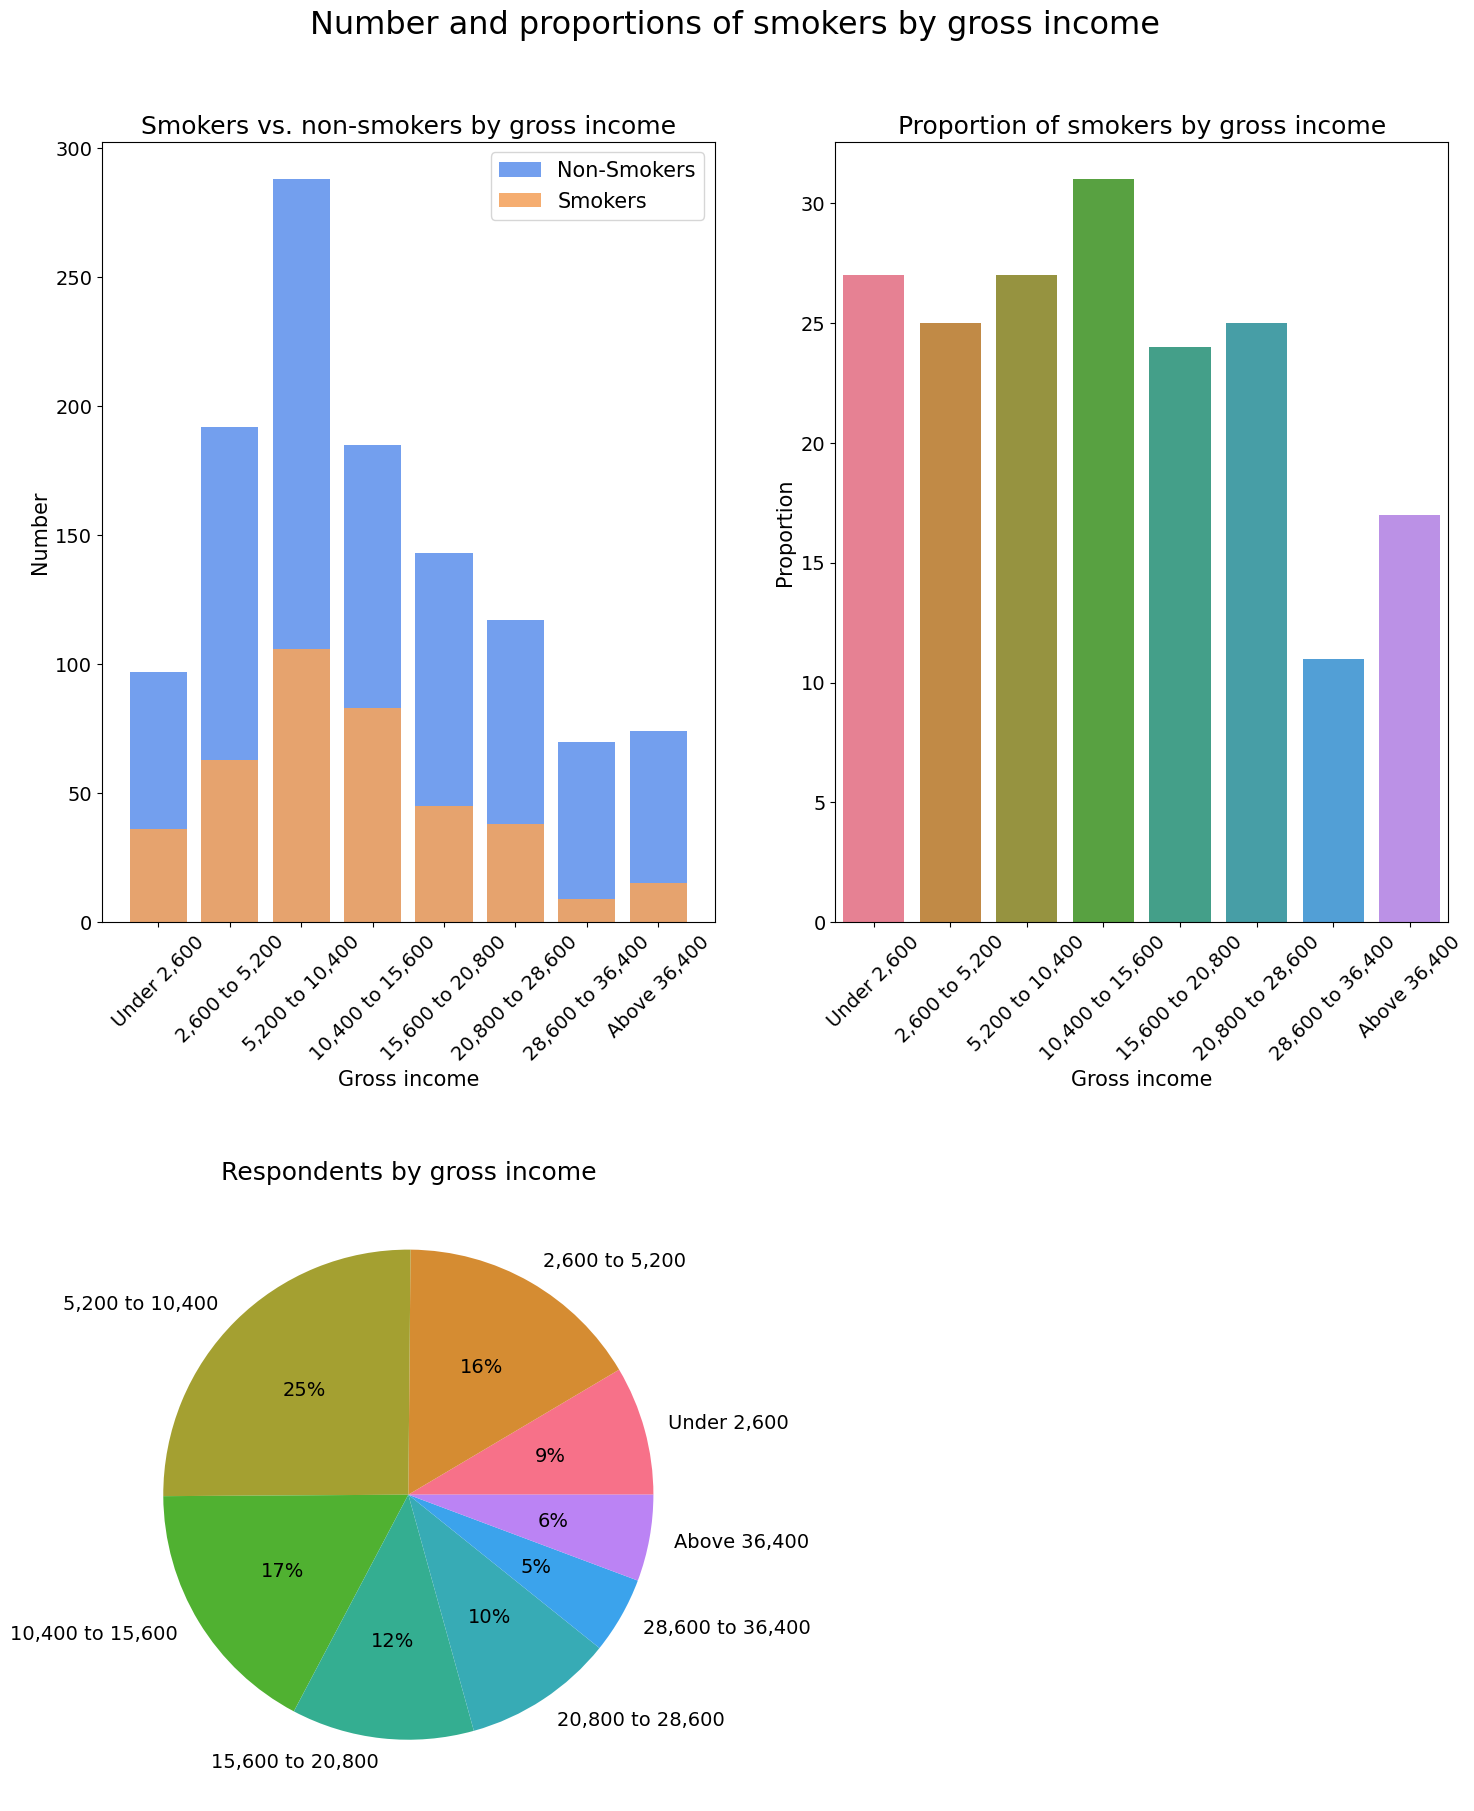

Reject H₀, accept H₁: there is a significant correlation between smoking and gross income.

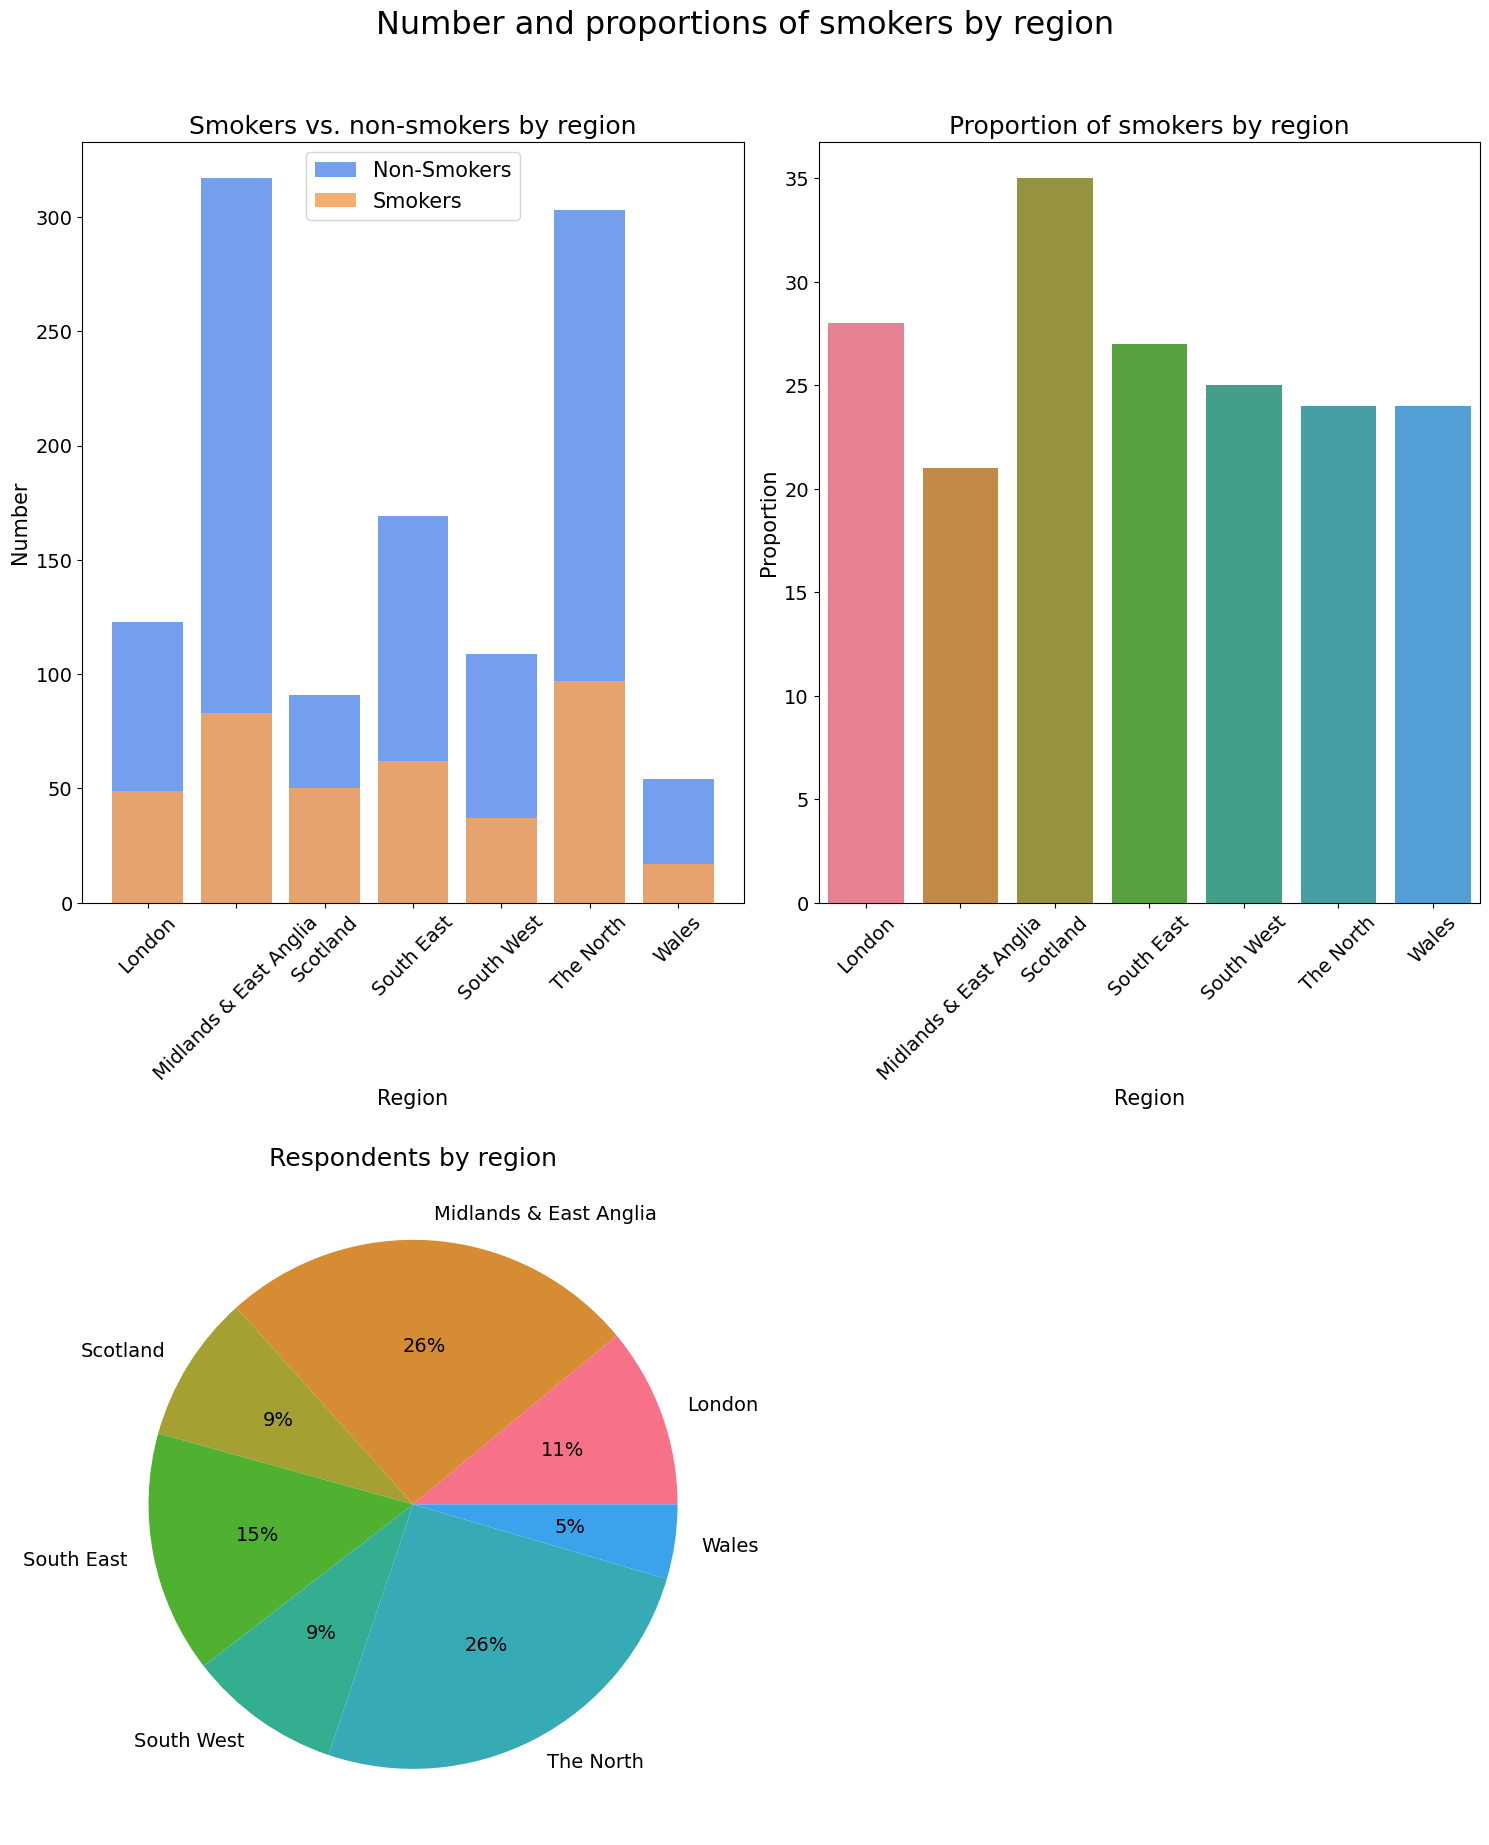

Reject H₀, accept H₁: there is a significant correlation between smoking and region.

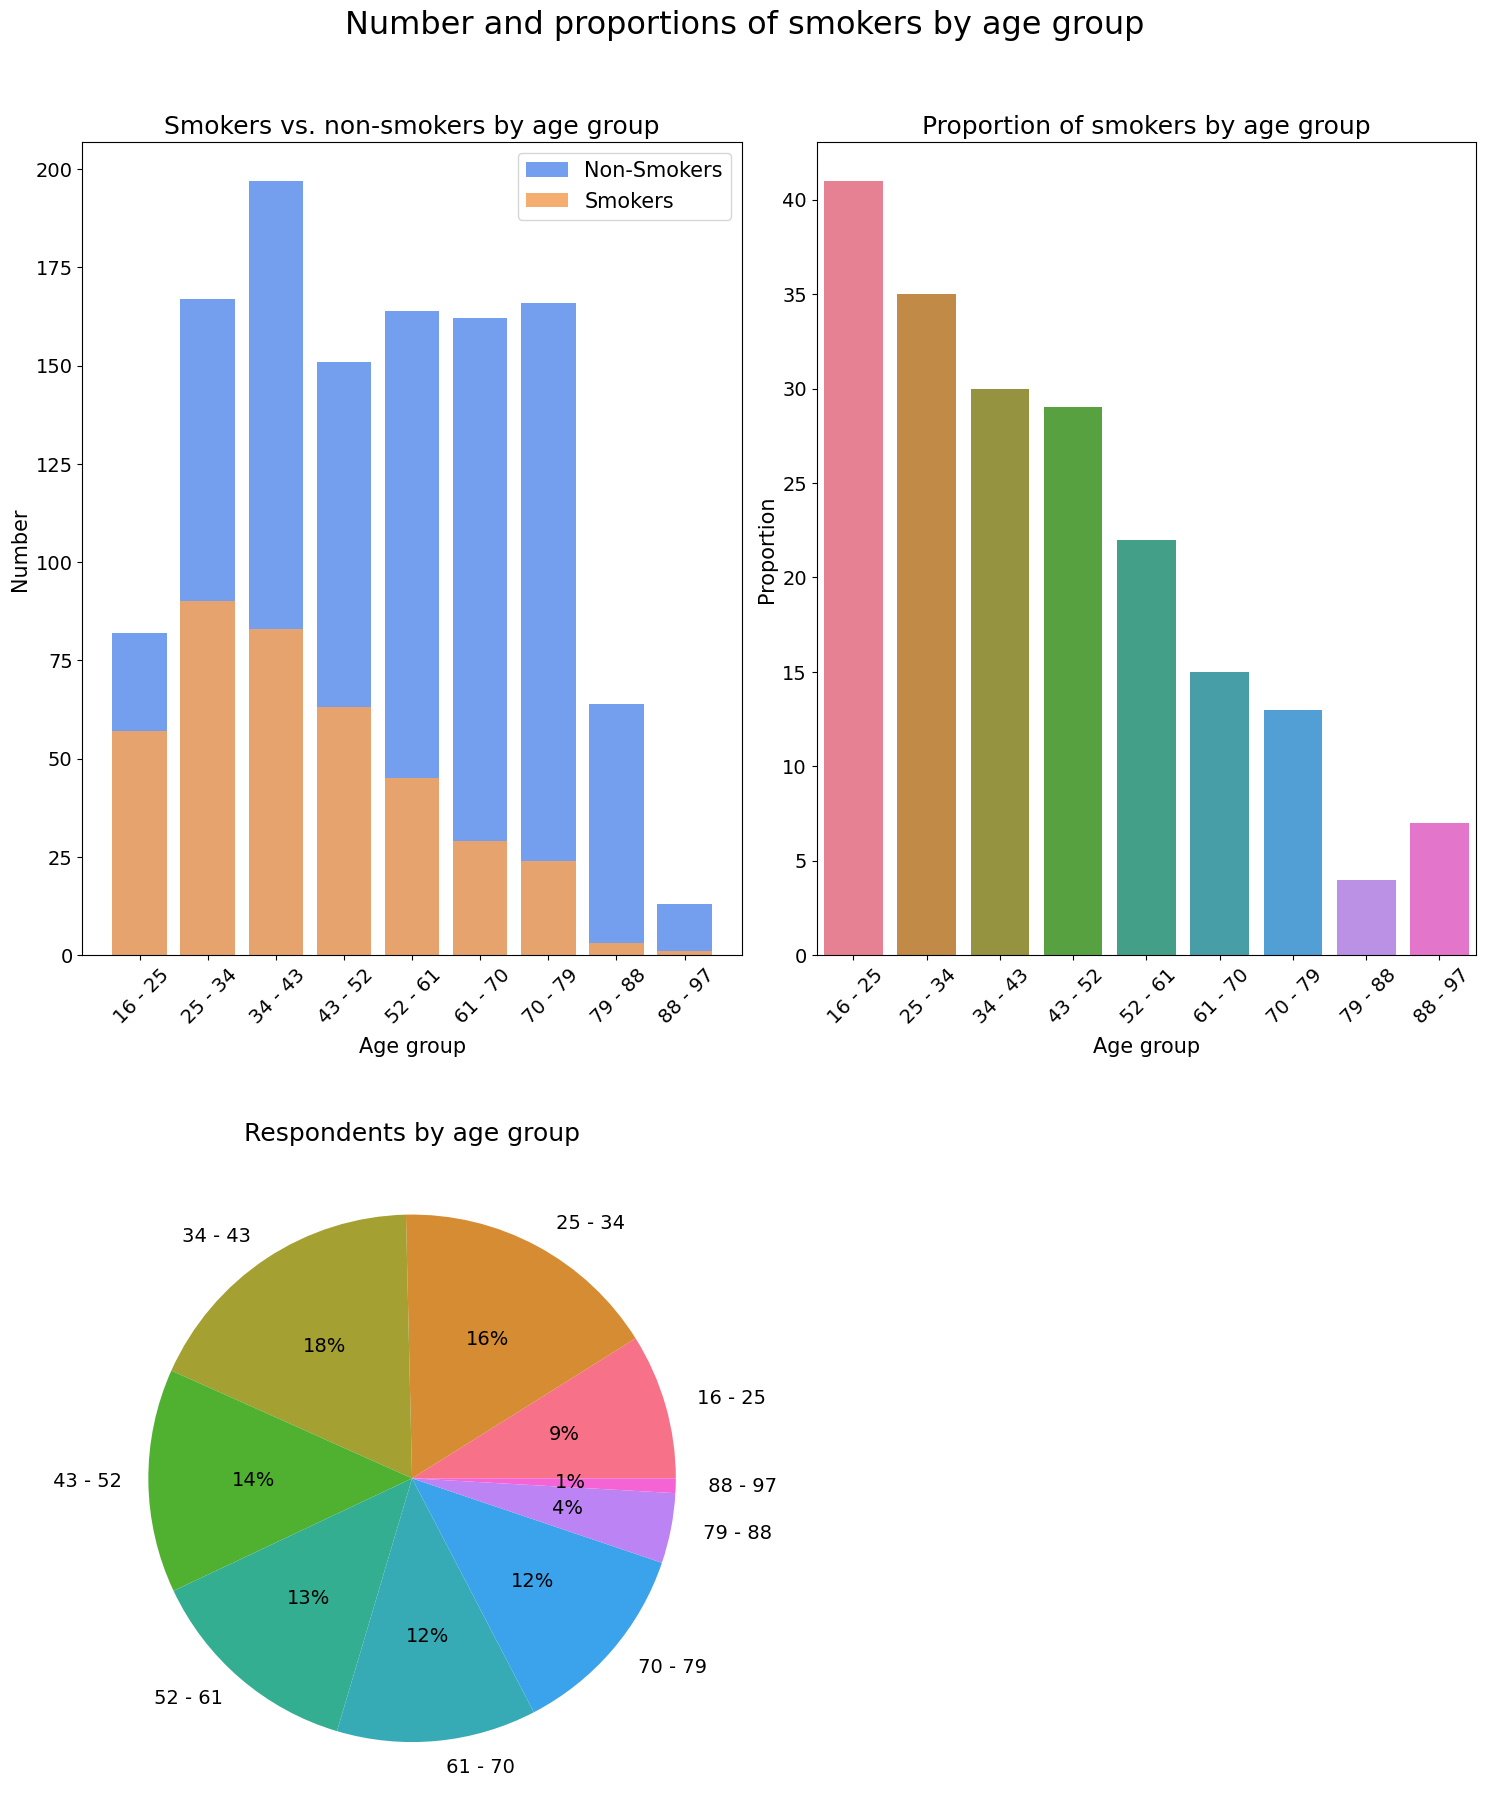

Reject H₀, accept H₁: there is a significant correlation between smoking and age group.

In [120]:
dict = {}

for category in categories:
    if category == 'highest_qualification':
        order = qualorder
    elif category == 'gross_income':
        order = incorder
    else:
        order = df_clean[category].sort_values().unique()
    cat = df_clean.groupby(by=[category])[category].count().loc[order]
    cats = df_clean.groupby(by=[category,'smoke'])['smoke'].count().unstack().loc[order]
    catp = summary1(category)
    
    palette1 = sns.color_palette("husl", 9)

    fonttitle = 23
    fontsub = 18
    fontaxes = 15
    fonttick = 14
    
    fig, axes = plt.subplots(2,2, figsize=(15,18), gridspec_kw={'width_ratios':[1,1]})
    
    axes[0,0].bar(x=cats.index, height=cats['No'], color='cornflowerblue', alpha=0.9, label='Non-Smokers')
    axes[0,0].bar(x=cats.index, height=cats['Yes'], color='sandybrown', alpha=0.9, label='Smokers')
    axes[0,0].set_xlabel(category.replace("_"," ").capitalize(), fontsize=fontaxes)
    axes[0,0].tick_params(axis='x', rotation=45, labelsize=14)
    axes[0,0].set_ylabel('Number', fontsize=fontaxes)
    axes[0,0].tick_params(axis='y', labelsize=14)
    axes[0,0].legend(fontsize=fontaxes)
    axes[0,0].set_title(f'Smokers vs. non-smokers by {category.replace("_"," ")}', fontsize=fontsub)
    
    axes[0,1] = sns.barplot(x=catp.index, y='Proportion', data=catp, palette=palette1, order=order, ax=axes[0,1])
    axes[0,1].set_xlabel(category.replace("_"," ").capitalize(), fontsize=fontaxes)
    axes[0,1].tick_params(axis='x', rotation=45, labelsize=fonttick)
    axes[0,1].set_ylabel('Proportion', fontsize=fontaxes)
    axes[0,1].tick_params(axis='y', labelsize=fonttick)
    axes[0,1].set_title(f'Proportion of smokers by {category.replace("_"," ")}', fontsize=fontsub)

    axes[1,0].pie(x=cat.values, data=cat, labels=cat.index, autopct='%1.0f%%', pctdistance=0.6, colors=palette1, textprops={'fontsize': fonttick})
    axes[1,0].set_title(f'Respondents by {category.replace("_"," ")}', fontsize=fontsub)
    
    fig.delaxes(axes[1,1])
    fig.tight_layout()
    fig.suptitle(f'Number and proportions of smokers by {category.replace("_"," ")}', fontsize=fonttitle, y=1.05)
    plt.show()

    pvalue = round(chi2_contingency(cats)[1],4)
    dict[category] = pvalue
    
    if pvalue < 0.05:
        result = f'Reject H\u2080, accept H\u2081: there is a significant correlation between smoking and {category.replace("_"," ")}.'
    else:
        result = f'Accept H\u2080: there is no significant correlation between smoking and {category.replace("_"," ")}.'

    display_markdown(result,raw=True)

    
    print('\n')

Below is a summary table of the results of the p-value hypothesis tests.

In [30]:
def formatter(val):
    if type(val) == str:
        return val.replace("_"," ").capitalize()
    return val

def hypothesis(val):
        if val < 0.05:
            return f'Reject H\u2080, accept H\u2081.'
        else:
            return f'Accept H\u2080.'


In [31]:
df_pvals = pd.DataFrame.from_dict(dict, orient='index', columns=['p-value'])
df_pvals = df_pvals.reset_index()
df_pvals = df_pvals.applymap(formatter)
df_pvals.set_index(['index'], inplace=True)
df_pvals['hypothesis'] = df_pvals['p-value'].apply(hypothesis)
df_pvals

,p-value,hypothesis
index,,
Gender,0.6858,Accept H₀.
Marital status,0.0000,"Reject H₀, accept H₁."
Highest qualification,0.0000,"Reject H₀, accept H₁."
Nationality,0.0131,"Reject H₀, accept H₁."
Ethnicity,0.7222,Accept H₀.
Gross income,0.0171,"Reject H₀, accept H₁."
Region,0.0344,"Reject H₀, accept H₁."
Age group,0.0000,"Reject H₀, accept H₁."


We can see that all demographics, aside from gender and ethnicity correlate to smoking status.

## Amount and type smoked

Distribution of amount smoked across weekdays and weekends. I have chosen three different methods for visualising distribution: histograms, violinplots and box plots.

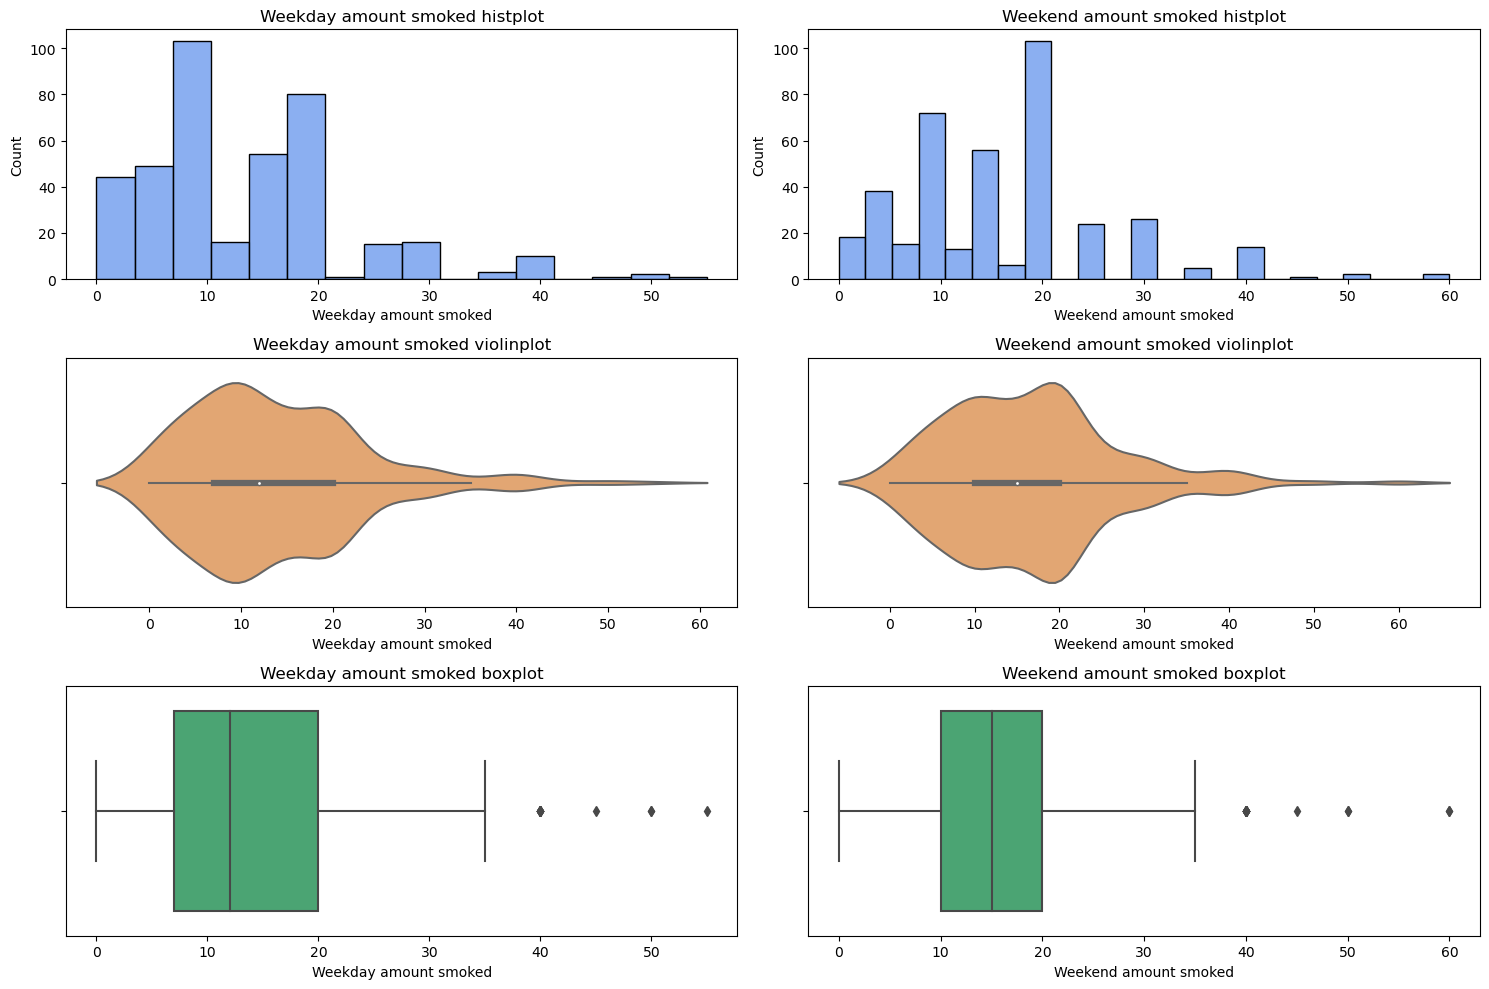

In [162]:
fig, axes = plt.subplots(3,2, figsize=(15,10), gridspec_kw={'width_ratios':[1,1]})
colours = ['cornflowerblue','sandybrown','mediumseagreen','mediumorchid']

plots = ['histplot','violinplot','boxplot']
amt = ['amt_weekdays','amt_weekends']
counti = 0
for i in plots:
    countj = 0
    for j in amt:
        getattr(sns, i)(
            data=df_clean,
            x=j,
            color=colours[counti],
            ax=axes[counti,countj],
            )
        axes[counti,countj].set_xlabel(f'{j[4:-1].capitalize()} amount smoked')
        axes[counti,countj].set_title(f'{j[4:-1].capitalize()} amount smoked {i}')
        countj += 1
    counti += 1

plt.tight_layout()
plt.show()

The violin plot is perhaps the clearest visualisation to quickly see that the average number of packs/units smoked has increased across the weekend, which we would expect.

I have produced a pie chart to show the breakdown on smoking type across those who identified as smokers.

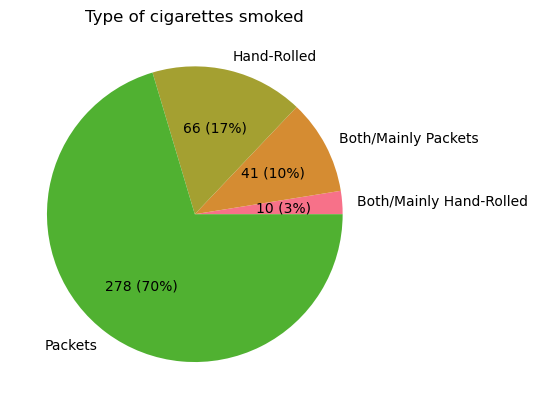

In [164]:
type = df_clean.groupby(by='type')['type'].count()

fig, axes = plt.subplots(1)
total = type.values.sum()
axes.pie(data=type, x=type.values, labels=type.index, autopct= lambda p: f'{int((p * total)/100+0.5)} ({p:.0f}%)', colors=palette1);
axes.set_title('Type of cigarettes smoked')
plt.show()

The majority of smokers opt for packets, with a smaller fraction using a mixture, or hand-rolled.

### Amount smoked by age group

In the earlier analysis, we saw how strongly correlated age was to the whether or not you were likely to smoke. In general, the older population appears to smoke less than the younger generation.

I'd like to do a bit more analysis on the amount of cigarettes smoked compared to the ages. For this I will use the age or age group category depending on my analysis.

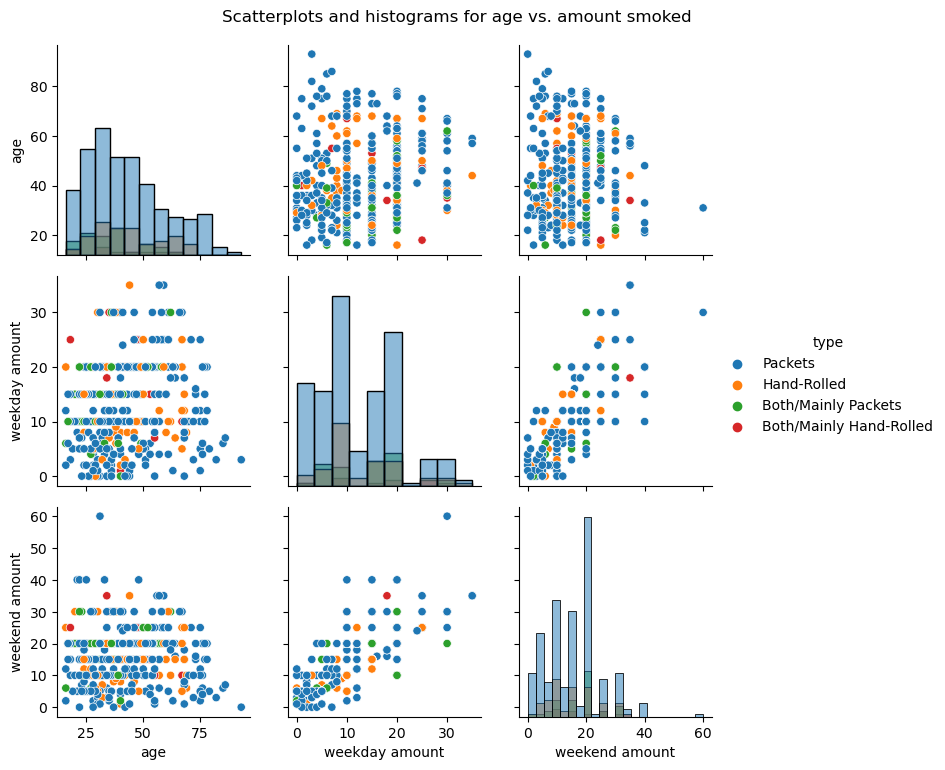

In [194]:
df_clean2 = df_clean[(df_clean['amt_weekdays'] < 40) & (df_clean['smoke'] == 'Yes')]
replacements = {'amt_weekends': 'weekend amount','amt_weekdays': 'weekday amount'}

g = sns.PairGrid(data=df_clean2, x_vars=['age','amt_weekdays','amt_weekends'], y_vars=['age','amt_weekdays','amt_weekends'], hue='type');
g.map_offdiag(sns.scatterplot)
g.map_diag(sns.histplot)

for i in range(3):
    for j in range(3):
        xlabel = g.axes[i][j].get_xlabel()
        ylabel = g.axes[i][j].get_ylabel()
        if xlabel in replacements.keys():
            g.axes[i][j].set_xlabel(replacements[xlabel])
        if ylabel in replacements.keys():
            g.axes[i][j].set_ylabel(replacements[ylabel])

g.add_legend()
plt.suptitle('Scatterplots and histograms for age vs. amount smoked', y=1.02)
plt.show()

We can see from the pairplots that there is not much correlation between age and amount smoked. The only real correlation is between weekends and weekdays, which we would expect. This is further seen below in the correlation heat map.

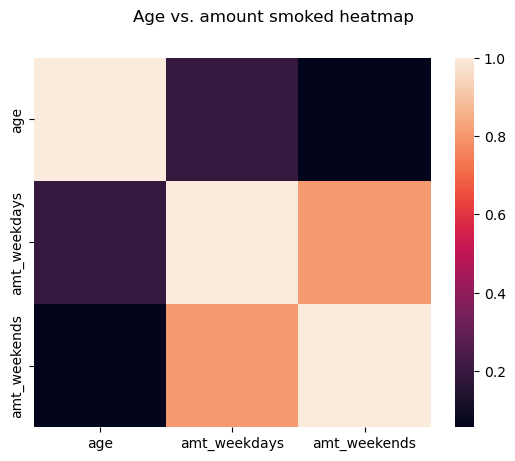

In [198]:
df_corr = df_clean[['age','amt_weekdays','amt_weekends']][df_clean['smoke'] == 'Yes'].corr()

fig, axes = plt.subplots(1)
sns.heatmap(df_corr)
plt.suptitle('Age vs. amount smoked heatmap')
plt.show()

As a final piece of analysis, I have chosen to weight the proportion of smokers within each age group by the average amount smoked for that age group. This gives a rough expected value for amount smoked across the population (assuming the sample for this survey is representative of the population, which may not be the case.)

In [202]:
def proportion(var):
    summary = df_clean.groupby([var,'smoke'])[[var]].count().unstack()
    summary.columns = summary.columns.droplevel([0])
    summary = summary.rename_axis(None, axis=1).reset_index().set_index(var)
    summary['proportion'] = round(summary['Yes'] / (summary['Yes'] + summary['No'])*100,0)
    summary

    df_aw = df_clean[[var,'amt_weekends']].groupby(by=var).mean().round(0)
    df_aw = df_aw.merge(summary, left_index=True, right_index=True)[['amt_weekends','proportion']]
    df_aw['weighted'] = round(df_aw['amt_weekends'] * df_aw['proportion']/100,1)
    return df_aw

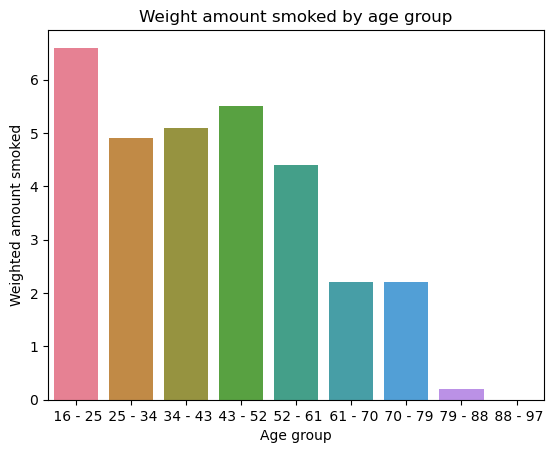

In [210]:
df_weight = proportion('age_group')

fig, axes = plt.subplots(1)
sns.barplot(data=df_weight, x=df_weight.index, y=df_weight['weighted'], ax=axes, palette=palette1)
axes.set_xlabel('Age group')
axes.set_ylabel('Weighted amount smoked')
axes.set_title('Weight amount smoked by age group')
plt.show()

As with previous analyses, we can see that the younger population, on average, smokes more than the older generation.

### Conclusions

1) I have demonstrated that all demographics, bar gender and ethnicity significantly correlate with smoking status. This demonstrates the influence people's surroundings have on their likeliness of taking up smoking.

2) For those who do smoke, there is no significant correlation between amount smoked and age.

3) The expected number of packets smoked across the entire sample (smokers and non-smokers) is higher for younger people than older people.

In [50]:
display(df_pvals)

,p-value,hypothesis
index,,
Gender,0.6858,Accept H₀.
Marital status,0.0000,"Reject H₀, accept H₁."
Highest qualification,0.0000,"Reject H₀, accept H₁."
Nationality,0.0131,"Reject H₀, accept H₁."
Ethnicity,0.7222,Accept H₀.
Gross income,0.0171,"Reject H₀, accept H₁."
Region,0.0344,"Reject H₀, accept H₁."
Age group,0.0000,"Reject H₀, accept H₁."
